# Visão Computacional: O Guia Completo - Redes neurais convolucionais para classificação de imagens

# Importação das bibliotecas

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.__version__ # !pip install tensorflow==2.6.0

'2.13.0'

# Carregamento das imagens

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/Visão Computacional: O Guia Completo/data/Datasets/homer_bart_2.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

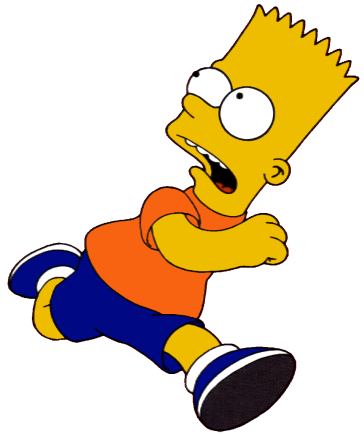

In [5]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/bart/bart100.bmp')

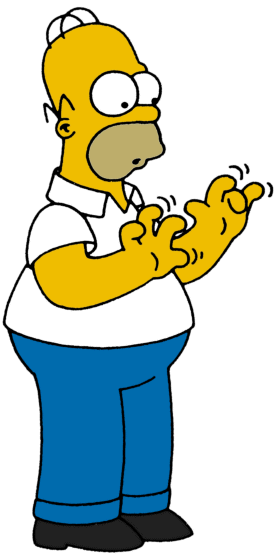

In [6]:
tf.keras.preprocessing.image.load_img('/content/homer_bart_2/training_set/homer/homer100.bmp')

# Bases de treinamento e teste

In [7]:
gerador_treinamento = ImageDataGenerator(rescale=1./255,
                                         rotation_range=7,
                                         horizontal_flip=True,
                                         zoom_range=0.2)

In [8]:
dataset_treinamento = gerador_treinamento.flow_from_directory('/content/homer_bart_2/training_set',
                                                              target_size = (64, 64),
                                                              batch_size = 8,
                                                              class_mode = 'categorical',
                                                              shuffle = True)

Found 215 images belonging to 2 classes.


In [9]:
dataset_treinamento.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [10]:
dataset_treinamento.class_indices

{'bart': 0, 'homer': 1}

In [11]:
gerador_teste = ImageDataGenerator(rescale=1./255)
dataset_teste = gerador_teste.flow_from_directory('/content/homer_bart_2/test_set',
                                                  target_size = (64,64),
                                                  batch_size = 1,
                                                  class_mode = 'categorical',
                                                  shuffle=False)

Found 54 images belonging to 2 classes.


# Construção e treinamento da rede neural

In [12]:
6 * 6 * 32

1152

In [13]:
(1152 + 2) / 2

577.0

In [14]:
network = Sequential()
network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units = 577, activation='relu'))
network.add(Dense(units = 577, activation='relu'))
network.add(Dense(units = 2, activation='softmax'))

network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)          0

In [15]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
historico = network.fit(dataset_treinamento, epochs=50)

Epoch 1/50
27/27 [==============================] - 12s 25ms/step - loss: 0.6758 - accuracy: 0.6047
Epoch 2/50
27/27 [==============================] - 1s 20ms/step - loss: 0.6043 - accuracy: 0.6837
Epoch 3/50
27/27 [==============================] - 1s 19ms/step - loss: 0.5683 - accuracy: 0.6837
Epoch 4/50
27/27 [==============================] - 1s 18ms/step - loss: 0.4611 - accuracy: 0.7814
Epoch 5/50
27/27 [==============================] - 1s 19ms/step - loss: 0.4363 - accuracy: 0.8047
Epoch 6/50
27/27 [==============================] - 1s 18ms/step - loss: 0.4095 - accuracy: 0.7953
Epoch 7/50
27/27 [==============================] - 1s 19ms/step - loss: 0.3222 - accuracy: 0.8744
Epoch 8/50
27/27 [==============================] - 1s 19ms/step - loss: 0.3654 - accuracy: 0.8372
Epoch 9/50
27/27 [==============================] - 1s 26ms/step - loss: 0.3087 - accuracy: 0.8884
Epoch 10/50
27/27 [==============================] - 1s 19ms/step - loss: 0.3030 - accuracy: 0.8651
Epoch 11

# Avaliação da rede neural

In [17]:
dataset_teste.class_indices

{'bart': 0, 'homer': 1}

In [18]:
previsoes = network.predict(dataset_teste)
previsoes

54/54 [==============================] - 0s 3ms/step


array([[1.00000000e+00, 5.08596170e-22],
       [1.00000000e+00, 1.13398074e-19],
       [3.24697658e-06, 9.99996781e-01],
       [1.00000000e+00, 4.14711699e-29],
       [1.00000000e+00, 4.93229710e-25],
       [1.00000000e+00, 1.89839693e-31],
       [1.00000000e+00, 4.58402351e-19],
       [9.99988914e-01, 1.11320178e-05],
       [9.97536540e-01, 2.46344414e-03],
       [9.98188317e-01, 1.81163312e-03],
       [9.99080777e-01, 9.19266895e-04],
       [1.00000000e+00, 1.25078505e-20],
       [9.99999881e-01, 6.49777334e-08],
       [9.99978065e-01, 2.19083995e-05],
       [9.99769986e-01, 2.29981393e-04],
       [1.00000000e+00, 6.45186291e-29],
       [7.37876826e-06, 9.99992609e-01],
       [1.00000000e+00, 2.38065012e-09],
       [9.99995947e-01, 4.09206859e-06],
       [1.00000000e+00, 1.99920449e-37],
       [9.99999881e-01, 8.58996287e-08],
       [1.00000000e+00, 1.27753125e-24],
       [9.99999523e-01, 4.46900373e-07],
       [3.06838681e-03, 9.96931553e-01],
       [1.000000

In [19]:
previsoes = np.argmax(previsoes, axis = 1)
previsoes

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
dataset_teste.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [21]:
# Abordagem 1 (extração de todos os pixels) - 0.72
# Abordagem 2 (extração de características) - 0.94
from sklearn.metrics import accuracy_score
accuracy_score(dataset_teste.classes, previsoes)

0.8703703703703703

In [22]:
dataset_teste.class_indices

{'bart': 0, 'homer': 1}

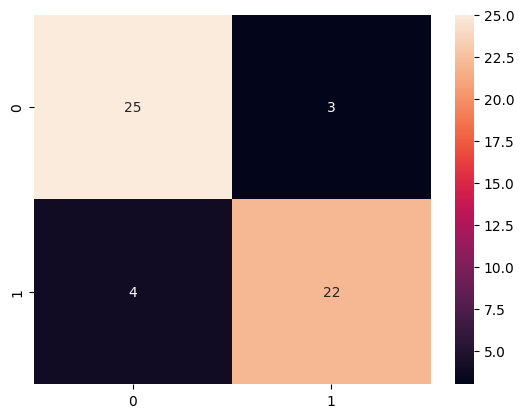

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dataset_teste.classes, previsoes)
sns.heatmap(cm, annot=True);

In [24]:
from sklearn.metrics import classification_report
print(classification_report(dataset_teste.classes, previsoes))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.88      0.85      0.86        26

    accuracy                           0.87        54
   macro avg       0.87      0.87      0.87        54
weighted avg       0.87      0.87      0.87        54



# Salvar e carregar a rede neural

In [ ]:
model_json = network.to_json()
with open('network.json','w') as json_file:
  json_file.write(model_json)

In [ ]:
from keras.models import save_model
network_saved = save_model(network, '/content/weights.hdf5')

In [ ]:
with open('network.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_3_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_3", "trainable": true, "batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_3", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2

In [ ]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('weights.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
network_loaded.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

# Classificação de uma única imagem

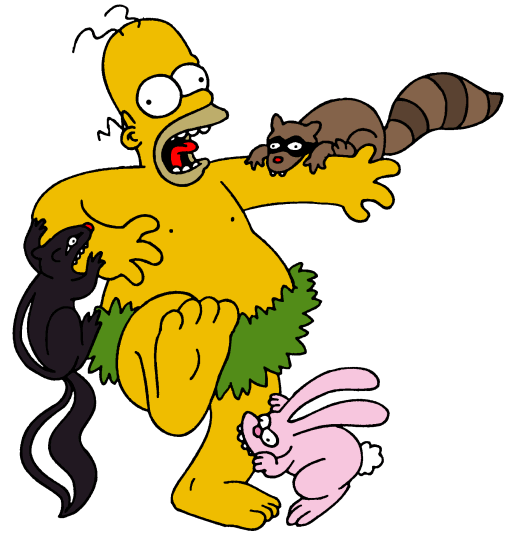

In [ ]:
imagem = cv2.imread('/content/homer_bart_2/test_set/homer/homer15.bmp')
cv2_imshow(imagem)

In [ ]:
imagem.shape

(536, 514, 3)

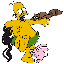

In [ ]:
imagem = cv2.resize(imagem, (64, 64))
cv2_imshow(imagem)

In [ ]:
imagem

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [ ]:
imagem = imagem / 255
imagem

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [ ]:
imagem.shape

(64, 64, 3)

In [ ]:
imagem = imagem.reshape(-1, 64, 64, 3)
imagem.shape

(1, 64, 64, 3)

In [ ]:
previsao = network_loaded.predict(imagem)
previsao

array([[2.7274893e-04, 9.9972719e-01]], dtype=float32)

In [ ]:
previsao = np.argmax(previsao)
previsao

1

In [ ]:
dataset_teste.class_indices

{'bart': 0, 'homer': 1}

In [ ]:
if previsao == 0:
  print('Bart')
else:
  print('Homer')

Homer
